<div dir="rtl" style="text-align: center;">

# لیگ علم داده
### پاسخنامه چالش های هفته دوم
#### هفته دوم: پاکسازی و مهندسی ویژگی 
 

---

</div>

<div dir="rtl">

---
## چالش ۱: پاکسازی داده 

</div>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

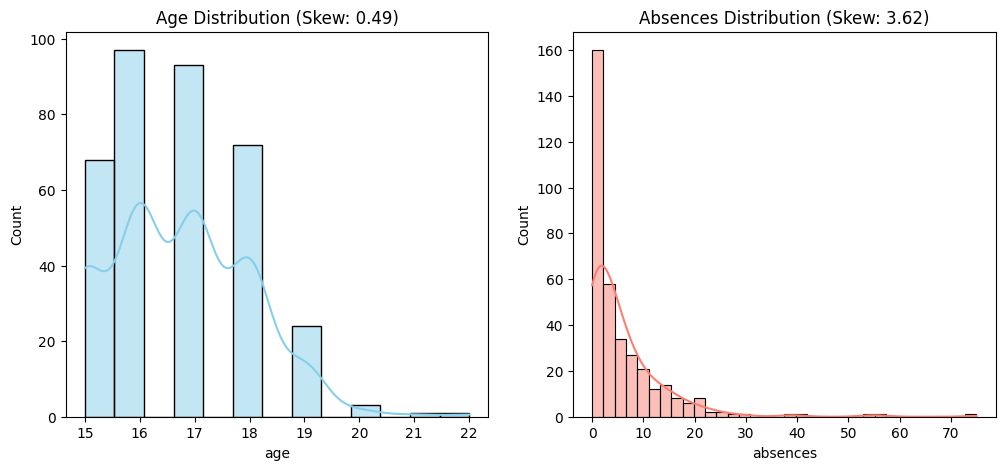

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title(f"Age Distribution (Skew: {df['age'].skew():.2f})")

plt.subplot(1, 2, 2)
sns.histplot(df['absences'], kde=True, color='salmon')
plt.title(f"Absences Distribution (Skew: {df['absences'].skew():.2f})")

plt.show()

<div dir="rtl">

#### 📊 تحلیل توزیع ویژگی‌ها:

* **📏 ستون `Age`:** توزیع آن تقریباً متقارن است (چولگی کمتر از ۰.۵). اگرچه کاملاً نرمال نیست، اما رفتار **"نرمال‌گونه"** دارد.
* **📉 ستون `Absences`:** دارای **چولگی مثبت شدید** (`Right Skewed`) است. اکثر دانش‌آموزان بین ۰ تا ۵ غیبت دارند، اما تعداد کمی غیبت‌های بسیار بالا (مثلاً ۷۵) دارند که باعث کشیدگی نمودار به سمت راست شده است.

</div>

<div dir="rtl">

### 🕵️ بخش دوم: شناسایی داده‌های پرت (`Z-Score` vs. `IQR`)

این بخش مهم‌ترین درس آماری این چالش است. انتخاب ابزار اشتباه، باعث می‌شود داده‌های پرت واقعی را نبینید یا داده‌های سالم را به اشتباه حذف کنید.

* **روش `Z-Score`:** فرض می‌کند داده‌ها **توزیع نرمال** دارند.
* **روش `IQR`:** به توزیع داده وابسته نیست و برای **داده‌های کج** (`Skewed`) عالی عمل می‌کند.

---

#### ✅ انتخاب استراتژی صحیح:

1.  **برای `Age` (که تقریباً نرمال است):** می‌توان از **`Z-Score`** استفاده کرد.
2.  **برای `Absences` (که شدیداً کج است):** حتماً باید از **`IQR`** استفاده کرد. 

> **⚠️ یک اشتباه رایج:** استفاده از `Z-Score` برای داده‌های کج اشتباه است؛ زیرا در این حالت میانگین و انحراف معیار توسط همان داده‌های پرت "آلوده" شده‌اند و معیار دقیقی برای سنجش فاصله به ما نمی‌دهند.

</div>

In [10]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)]
print(f"تعداد داده‌های پرت در غیبت‌ها با روش IQR: {len(outliers_iqr)}")

تعداد داده‌های پرت در غیبت‌ها با روش IQR: 15


<div dir="rtl">

### ⚖️ بخش سوم: دادگاه داده‌ها (مدیریت پرت‌ها)

در بخش قبلی، داده‌های پرت (مانند غیبت‌های بسیار بالا) را شناسایی کردیم. حالا سوال بزرگ این است: **با آن‌ها چه کنیم؟**

#### 📝 استدلال و حکم نهایی (پاسخ تحلیلی):

* **❌ حذف کردن (`Trimming`):** **رأی منفی.** دیتاست ما کوچک است (کمتر از ۴۰۰ رکورد). حذف ۲۰ یا ۳۰ رکورد یعنی دور ریختن حدود ۱۰٪ کل داده‌ها! علاوه بر این، کسی که ۷۵ غیبت دارد، رفتار متفاوتی در نمره گرفتن نشان می‌دهد؛ این یک **"سیگنال"** است، نه نویز.
* **⚠️ سقف‌گذاری (`Capping/Winsorizing`):** **قابل قبول.** در این روش، داده‌های پرت را حذف نمی‌کنیم، بلکه آن‌ها را تعدیل می‌کنیم. مثلاً تمام غیبت‌های بالای ۲۰ را روی عدد ۲۰ "قفل" می‌کنیم تا اثر تخریبی آن‌ها روی مدل کاهش یابد.
* **✅ تبدیل داده (`Transformation`):** **رأی نهایی (بهترین روش).** به جای حذف یا تغییر اجباری مقادیر، "مقیاس ریاضی" داده را عوض می‌کنیم. با این کار، داده‌های پرت بدون از دست رفتن، اصطلاحاً **"رام"** شده و به بدنه اصلی داده‌ها نزدیک می‌شوند.

---

#### 🧪 آزمایشگاه تبدیل داده‌ها (`Transformation Lab`)

بیایید ببینیم کدام روش ریاضی، داده‌های وحشیِ `absences` را بهتر رام می‌کند و توزیع را به حالت نرمال (زنگوله‌ای) برمی‌گرداند:

</div>

In [12]:
# اضافه کردن ۱ به داده‌ها چون لگاریتم صفر تعریف نشده است
data = df['absences'] + 1 

log_data = np.log(data)

sqrt_data = np.sqrt(data)

boxcox_data, _ = stats.boxcox(data)

print(f"Original Skewness: {data.skew():.2f}")
print(f"Log Skewness: {log_data.skew():.2f}")
print(f"Sqrt Skewness: {sqrt_data.skew():.2f}")
print(f"Box-Cox Skewness: {pd.Series(boxcox_data).skew():.2f}")

Original Skewness: 3.62
Log Skewness: 0.05
Sqrt Skewness: 1.27
Box-Cox Skewness: 0.01


<div dir="rtl">

#### 🏆 نتیجه‌گیری آزمایشگاه:

روش **Box-Cox** یا **Log** بهترین عملکرد را دارند و چولگی را به نزدیک صفر می‌رساند. با این کار، داده‌های پرت (مثل عدد ۷۵) به عددی منطقی‌تر تبدیل می‌شوند و دیگر نیازی به حذف فیزیکی آن‌ها نیست!

---

#### ⚖️ سوال انتقادی: آیا انجام این کار همیشه ضروری است؟

پاسخ به **نوع مدلی** که انتخاب می‌کنید بستگی دارد:

* **اگر از مدل‌های درختی (`Random Forest` / `XGBoost`):** خیر؛ این مدل‌ها نسبت به توزیع داده‌ها حساس نیستند و با داده‌های کج هم به خوبی کار می‌کنند.
* **اگر از رگرسیون خطی یا شبکه عصبی:** بله؛ این مدل‌ها بر پایه فرضیات آماری یا محاسبات فاصله هستند و تغییر شکل داده (`Transformation`) دقت آن‌ها را به شدت بالا می‌برد.

</div>

<div dir="rtl">

### 🦋 بخش چهارم: اثر پروانه‌ای (The Sequence Effect)

این آزمایش به وضوح نشان می‌دهد که چرا **ترتیب عملیات‌ها** در پیش‌پردازش داده‌ها حیاتی است و یک جابه‌جایی کوچک چگونه می‌تواند کل سیگنال‌های موجود در داده را نابود کند.

---

</div>

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# داده فرضی با یک داده پرت بزرگ
arr = np.array([1, 2, 3, 4, 1000]).reshape(-1, 1)
scaler = MinMaxScaler()

# --- حالت الف: اول اسکیل، بعد حذف ---
scaled_A = scaler.fit_transform(arr)
# حذف آخرین عنصر (که همان ۱۰۰۰ بوده و الان ۱ شده)
final_A = scaled_A[:-1] 

print("حالت الف (ترتیب غلط):")
print(final_A.flatten())

# --- حالت ب: اول حذف، بعد اسکیل ---
arr_clean = np.array([1, 2, 3, 4]).reshape(-1, 1)
final_B = scaler.fit_transform(arr_clean)

print("\nحالت ب (ترتیب درست):")
print(final_B.flatten())

حالت الف (ترتیب غلط):
[0.       0.001001 0.002002 0.003003]

حالت ب (ترتیب درست):
[0.         0.33333333 0.66666667 1.        ]


<div dir="rtl">

#### 🧐 در حالت اول چه اتفاقی افتاد؟
تمام اعداد بین `0` و `0.003` فشرده شدند! با این کار، تفاوت معنادار بین مقادیر (مثلاً تفاوت ۱ و ۴ غیبت) عملاً از بین رفت و مدل دیگر نمی‌تواند الگویی را تشخیص دهد.

---

### ✅ نتیجه‌گیری نهایی (پایپ‌لاین استاندارد):

داده پرت، بازه (`Range`) اسکیلرها (مخصوصاً **MinMax**) را خراب می‌کند. پس همیشه باید **قبل** از اسکیل کردن، تکلیف پرت‌ها مشخص شود.

#### 🛠 ترتیب صحیح عملیات:

1.  **Outlier Handling:** (حذف، وینزورایز، یا ترنسفورمیشن).
2.  **Scaling:** (استانداردسازی یا نرمال‌سازی).

---

#### 💡 نکته  (Pro-Tip):
اگر از روش **Transformation** (مثل `Log`) استفاده کنید، این روش به طور همزمان شدت پرت‌ها را کم کرده و توزیع را به حالت نرمال نزدیک می‌کند. 

> **ترکیب برنده:** > ابتدا `Log Transform` ⬅️ سپس `StandardScaler`

</div>

<div dir="rtl">

### پایپ‌لاین هوشمند پاکسازی داده (Smart Data Cleaning Pipeline)

 کلاس زیر به صورت خودکار تشخیص می‌دهد که با چه نوع توزیعی طرف است و ابزار مناسب را انتخاب می‌کند.

</div>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin

class SmartOutlierHandler(BaseEstimator, TransformerMixin):
    """
    این کلاس به صورت هوشمند و خودکار داده‌های پرت را مدیریت می‌کند.
    استراتژی:
    1. بررسی توزیع با تست Shapiro-Wilk و ضریب Skewness.
    2. اگر توزیع نرمال بود -> استفاده از روش Z-Score (3-Sigma).
    3. اگر توزیع چوله (Skewed) بود -> استفاده از روش IQR.
    4. به جای حذف داده، آن را Winsorize (سقف‌گذاری/کف‌گذاری) می‌کند.
    """
    
    def __init__(self, target_cols=None, auto_detect=True, threshold=3.0, iqr_multiplier=1.5):
        df = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        if self.target_cols is None:
            self.target_cols = df.select_dtypes(include=[np.number]).columns.tolist()
            
        for col in self.target_cols:
            if col not in df.columns: continue
                
            data = df[col].dropna()
            
            # 1. تشخیص استراتژی
            is_normal_dist, skew_val = self._is_normal(data)
            self.dist_info_[col] = 'Normal' if is_normal_dist else f'Skewed ({skew_val:.2f})'
            
            # 2. محاسبه مرزها
            if is_normal_dist:
                # استراتژی Z-Score (Mean +/- 3*Std)
                mean, std = data.mean(), data.std()
                lower = mean - (self.threshold * std)
                upper = mean + (self.threshold * std)
            else:
                # استراتژی IQR
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - (self.iqr_multiplier * IQR)
                upper = Q3 + (self.iqr_multiplier * IQR)
            
            # ذخیره مرزها در حافظه کلاس
            self.bounds_[col] = (lower, upper)
            
        return self

    def transform(self, X):
        """
        اعمال برش‌ها (Winsorization) روی داده‌ها
        """
        df = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        
        for col, (lower, upper) in self.bounds_.items():
            if col in df.columns:
                df[col] = np.where(df[col] < lower, lower, df[col])
                df[col] = np.where(df[col] > upper, upper, df[col])
                
        return df

    def get_report(self):
        return pd.DataFrame({
            'Distribution': self.dist_info_,
            'Bounds': self.bounds_
        })

<div dir="rtl" style="width: 100%; overflow: hidden; white-space: nowrap; text-align: center; margin: 60px 0; user-select: none;">
    <span style="color: #d97706; font-size: 18px; letter-spacing: 15px; opacity: 0.6;">
        ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆
    </span>
    <div style="font-size: 12px; color: #9ca3af; margin-top: -10px; background: #fff; display: inline-block; padding: 0 15px; position: relative; bottom: 12px;">
        Next Challenge
    </div>
</div>

<div dir="rtl">

---
## چالش ۲:  هنرِ ترجمه (Encoding Strategy)

</div>

<div dir="rtl">

### 🎭 در این چالش، ما با یکی از مهم‌ترین تصمیمات در پیش‌پردازش داده‌ها روبرو شدیم:

> چگونه کلمات را به اعدادی تبدیل کنیم که مدل آن‌ها را بفهمد، **بدون اینکه معنای داده‌ها را خراب کنیم؟**

در ادامه ۳ روش اصلی را بررسی و پیاده‌سازی می‌کنیم.

---

#### 🛠 پیش‌نیازها
ابتدا کتابخانه مورد نیاز را نصب و داده‌ها را لود می‌کنیم:

</div>

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

df =  pd.read_csv('train.csv')

# آماده‌سازی اولیه (جدا کردن هدف از ویژگی‌ها)
X = df.drop('G3', axis=1)
y = df['G3']

# ⚠️ بسیار مهم: تقسیم داده‌ها قبل از هرگونه انکدینگ برای جلوگیری از نشت داده
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div dir="rtl">

### ۱. روش `One-Hot Encoding` (ایمن اما پرهزینه)

این روش برای هر دسته‌بندی یک ستون جدید (`0` و `1`) ایجاد می‌کند.

</div>

In [2]:
# استفاده از توابع پانداس (روش ساده)
# نکته: در پایپ‌لاین‌های حرفه‌ای بهتر است از sklearn.preprocessing.OneHotEncoder استفاده شود
X_train_onehot = pd.get_dummies(X_train[['Mjob']], prefix='Mjob')

print("تعداد ستون‌ها قبل از انکدینگ:", 1)
print("تعداد ستون‌ها بعد از انکدینگ:", X_train_onehot.shape[1])
print(X_train_onehot.head(3))

تعداد ستون‌ها قبل از انکدینگ: 1
تعداد ستون‌ها بعد از انکدینگ: 5
     Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher
289         False        False       False           True         False
335         False        False       False           True         False
231         False        False        True          False         False


<div dir="rtl">

#### 📊 تحلیل:

* **✅ مزیت:** هیچ رابطه ریاضی غلطی (مثل بزرگتر/کوچکتر) بین شغل‌ها ایجاد نمی‌کند.
* **❌ عیب:** **"نفرین ابعاد"** (`Curse of Dimensionality`). اگر ستونی مثل "کد پستی" با ۵۰۰ حالت داشتیم، ۵۰۰ ستون جدید اضافه می‌شد که سرعت و دقت مدل را به شدت کاهش می‌داد.

> **💡 نتیجه:**
> عالی برای ستون‌های **کم‌تعداد** (مثل جنسیت یا همین `Mjob`)، افتضاح برای ستون‌های **پرتعداد**.

</div>

<div dir="rtl">

### ۲. روش `Label Encoding` (خطرناک برای داده‌های اسمی)

این روش به هر شغل یک عدد نسبت می‌دهد (مثلاً معلم=۱، سلامت=۲).

</div>

In [4]:
le = LabelEncoder()
X_train_le = X_train.copy()
X_train_le['Mjob_encoded'] = le.fit_transform(X_train['Mjob'])

print(X_train_le[['Mjob', 'Mjob_encoded']].head(3))

         Mjob  Mjob_encoded
289  services             3
335  services             3
231     other             2


<div dir="rtl">

#### ⚠️ چرا این روش خطرناک است؟

ستون `Mjob` از نوع `Nominal` (بدون ترتیب) است. اما مدل‌های ریاضی (مثل رگرسیون یا شبکه عصبی) اعداد را دارای **ارزش ریاضی** می‌دانند.

وقتی مدل می‌بیند `Teacher = 4` و `At_home = 0`، ممکن است نتیجه بگیرد که:
* "تاثیر معلم بودن ۴ برابر خانه‌دار بودن است"
* یا "`Teacher` > `At_home`"

این یک **رابطه ریاضی کاذب** است که ما به مدل تحمیل کرده‌ایم و باعث کاهش دقت پیش‌بینی می‌شود.

> **💡 نکته:**
> این روش **فقط** برای داده‌های `Ordinal` (ترتیبی) مثل `Medu` (سطح تحصیلات) یا کیفیت نمرات (`A, B, C`) مناسب است.

</div>

<div dir="rtl">

### ۳. روش `Target Encoding` 

در این روش، اسم شغل با **"میانگین نمره هدف (`G3`)"** جایگزین می‌شود.

> **⚠️ چالش:**
> چالشی که در صورت سوال مطرح شد، **نشت داده** (`Data Leakage`) و **Overfitting** بود.

#### ❌ روش غلط:

</div>

In [5]:
target_means = df.groupby('Mjob')['G3'].mean()

df['Mjob_target'] = df['Mjob'].map(target_means)
print(df['Mjob_target'])

0      12.103448
1      11.076923
2       9.864662
3       9.864662
4       9.864662
         ...    
354     8.698113
355     9.864662
356     8.698113
357    11.032609
358    11.032609
Name: Mjob_target, Length: 359, dtype: float64


<div dir="rtl">

#### ✅ روش صحیح:

استفاده از کتابخانه `category_encoders` و پارامتر حیاتی **`smoothing`**.

</div>

In [6]:
target_enc = ce.TargetEncoder(cols=['Mjob'], smoothing=10)

# ⚠️ فیت کردن فقط روی داده‌های آموزش (Train)
target_enc.fit(X_train, y_train)

X_train_target = target_enc.transform(X_train)
X_test_target = target_enc.transform(X_test)

print("نتیجه انکدینگ:")
print(X_train_target[['Mjob']].head(5))

نتیجه انکدینگ:
          Mjob
289  10.738825
335  10.738825
231   9.717090
75    9.717090
194  11.646301


<div dir="rtl">

#### 🛡️ چگونه جلوی نشت داده (`Data Leakage`) را گرفتیم؟

با جدا کردن داده‌های **Train** و **Test** قبل از انکدینگ.
* ما میانگین‌ها را **فقط** از روی `y_train` محاسبه می‌کنیم. 
* اگر میانگین `y_test` را در محاسبات دخالت دهیم، عملاً تقلب کرده‌ایم و مدل اطلاعاتی را دیده که در واقعیت نباید به آن‌ها دسترسی داشته باشد.

---

#### ⚖️ چگونه جلوی `Overfitting` (روی داده‌های کم‌تکرار) را گرفتیم؟

با استفاده از تکنیک **Smoothing**. 

> **مثال:** فرض کنید در کل دیتاست فقط ۱ نفر مادرش "کارمند بانک" است و نمره او ۲۰ شده است. 
> * **بدون Smoothing:** مدل یاد می‌گیرد هر جا شغل "کارمند بانک" را دید، نمره را دقیقاً ۲۰ پیش‌بینی کند (سوگیری شدید).
> * **با Smoothing:** این عدد با میانگین کل جامعه تعدیل می‌شود (مثلاً از ۲۰ به ۱۵ نزدیک می‌شود) تا مدل روی یک نمونه خاص و استثنائی دچار خطای بیش‌برازش نشود.

</div>

<div dir="rtl">

#### ⚖️ پارامتر `smoothing` مثل یک ترازو عمل می‌کند.

مقدار نهایی انکدینگ، ترکیبی از میانگین دسته و میانگین کل (جامعه) است:

$$Val = w \times (\text{Category Mean}) + (1-w) \times (\text{Global Mean})$$

که در آن $w$ (وزن) عددی بین ۰ تا ۱ است:
* **اگر $w$ نزدیک ۱ باشد:** یعنی تعداد نمونه‌های آن شغل زیاد است و ما به میانگین خودِ آن شغل اعتماد داریم.
* **اگر $w$ نزدیک ۰ باشد:** یعنی تعداد نمونه‌ها کم است و برای جلوگیری از خطا، به میانگین کل جامعه تکیه می‌کنیم.

---

#### 📐 فرمول محاسبه وزن ($w$) به زبان ساده:

این وزن معمولاً توسط یک تابع **"سیگموئید"** (S-Curve) محاسبه می‌شود که دو ورودی اصلی دارد:

1.  **$n$**: تعداد دفعاتی که آن شغل در داده‌ها تکرار شده است.
2.  **$f$**: همان پارامتر `smoothing` که شما در کد تنظیم می‌کنید.

> هرچه $f$ را بزرگتر انتخاب کنید، برای اعتماد به میانگین یک دسته، به تعداد نمونه‌های بیشتری ($n$) نیاز خواهید داشت.

</div>

<div dir="rtl" style="width: 100%; overflow: hidden; white-space: nowrap; text-align: center; margin: 60px 0; user-select: none;">
    <span style="color: #d97706; font-size: 18px; letter-spacing: 15px; opacity: 0.6;">
        ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆
    </span>
    <div style="font-size: 12px; color: #9ca3af; margin-top: -10px; background: #fff; display: inline-block; padding: 0 15px; position: relative; bottom: 12px;">
        Next Challenge
    </div>
</div>

<div dir="rtl">

### چالش ۳: سراب همبستگی (The Mirage of Correlation)

</div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('train.csv')

# انکدینگ ساده برای اینکه بتوانیم مدل RF بزنیم (فقط برای تحلیل، نه مدل نهایی)
# تمام ستون‌های متنی را موقتاً به عدد تبدیل می‌کنیم
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

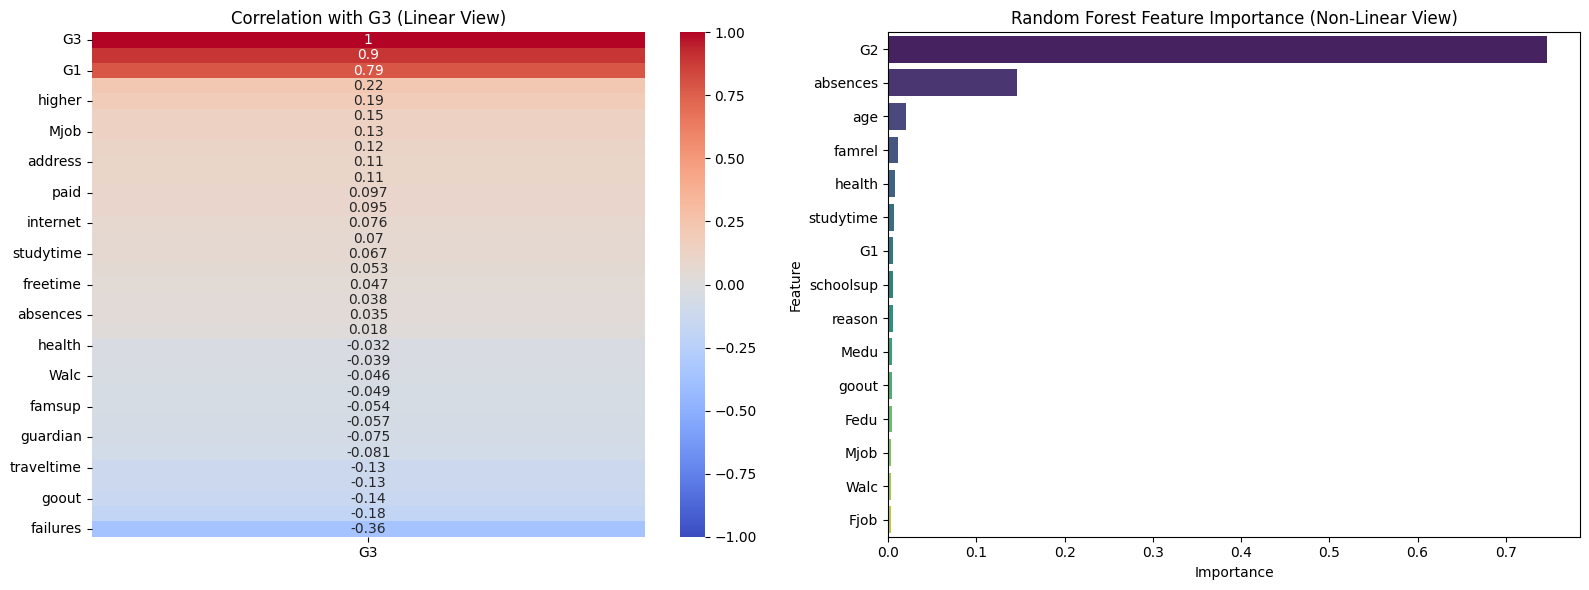

In [7]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
corr_matrix = df_encoded.corr()[['G3']].sort_values(by='G3', ascending=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with G3 (Linear View)")

plt.subplot(1, 2, 2)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# کد اصلاح شده و سازگار با نسخه‌های جدید Seaborn
sns.barplot(
    x='Importance', 
    y='Feature', 
    hue='Feature',      # اضافه شده: رنگ‌بندی بر اساس نام ویژگی
    data=feature_importance.head(15), 
    palette='viridis', 
    legend=False        # اضافه شده: حذف راهنمای رنگ (چون تکراری است)
)
plt.title("Random Forest Feature Importance (Non-Linear View)")

plt.tight_layout()
plt.show()

<div dir="rtl">

### تحلیل اهمیت ویژگی‌ها: چرا G2 از G1 سبقت گرفت؟

در خروجی مدل **Random Forest Regression**، مشاهده کردیم که نمره نوبت دوم (G2) اهمیت بسیار بیشتری نسبت به نمره نوبت اول (G1) در پیش‌بینی نمره نهایی پیدا کرده است.

#### پاسخ در مفاهیم هفته اول:

برای درک چرایی این پدیده، کافی است به پاسخنامه **چالش سوم و چهارم در هفته اول** مراجعه کنید. 


</div>

<div dir="rtl">

### تحلیل تفاوت ابزارها: همبستگی در برابر جنگل تصادفی

در این بخش به بررسی این موضوع می‌پردازیم که چرا ابزارهای مختلف، نتایج متفاوتی از اهمیت ویژگی‌ها ارائه می‌دهند:

#### ۱. تفاوت در نگاه به داده
* **همبستگی (Correlation):** فقط روابط **خطی** را می‌بیند. یعنی می‌پرسد: "آیا با افزایش X، مقدار Y همواره زیاد (یا کم) می‌شود؟"
* **جنگل تصادفی (Random Forest):** روابط **غیرخطی** و پیچیده را می‌بیند. او می‌پرسد: "آیا X در شکستن و تفکیک داده‌ها به من کمک می‌کند؟"

#### ۲. کدام قابل اعتمادتر است؟
در داده‌های پیچیده انسانی (مثل نمرات تحصیلی)، قطعاً **Random Forest** دید وسیع‌تری دارد. همبستگی ممکن است یک ویژگی مهم را که رابطه‌اش "سهمی‌شکل" ($U\text{-Shape}$) است، صفر نشان دهد (چون خطی نیست)، اما RF آن را بسیار مهم تشخیص می‌دهد.



#### ۳. مثال تناقض در این دیتاست
معمولاً متغیر `absences` (غیبت‌ها) همبستگی خطی کمی دارد (چون پراکندگی در آن زیاد است). اما در مدل **Random Forest**، این متغیر معمولاً جزو ۳ ویژگی برتر قرار می‌گیرد.

**چرا؟** چون مدل یاد می‌گیرد: "غیبت کم (۰ تا ۵) تأثیری ندارد، اما به محض اینکه غیبت از ۱۰ جلسه رد شد، نمره به شدت سقوط می‌کند." این یک الگوی غیرخطی و مبتنی بر آستانه (**Threshold-based**) است که همبستگی خطی قادر به شناسایی آن نیست.

</div>

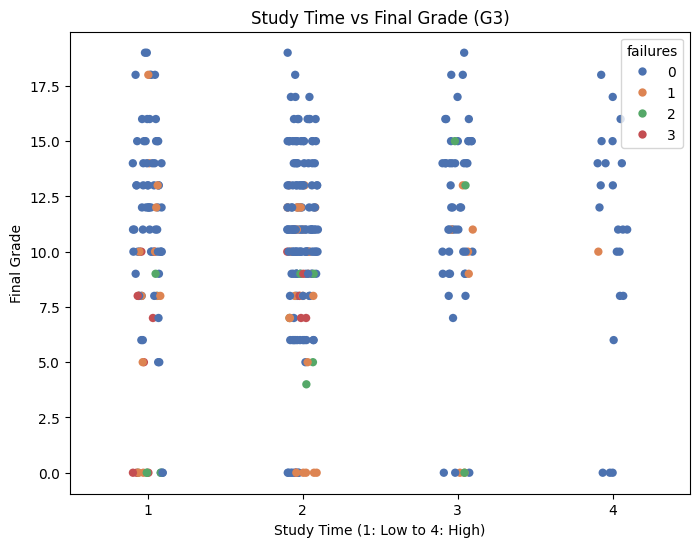

In [8]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='studytime', y='G3', data=df, jitter=True, size=6, palette='deep', hue='failures')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (1: Low to 4: High)")
plt.ylabel("Final Grade")
plt.show()

<div dir="rtl">

به‌طور کلی با افزایش زمان مطالعه از سطح ۱ به ۴، تمرکز نمرات به سمت مقادیر بالاتر حرکت می‌کند. با این حال، این رابطه کاملاً خطی نیست؛ یعنی افزایش زمان مطالعه لزوماً تضمین‌کننده نمره بالا نیست و پراکندگی نمرات در همه سطوح دیده می‌شود.

مشاهده نمره صفر حتی در `Study Time = 2` و `3` نشان می‌دهد که داده‌هایی با رفتار غیرمنتظره وجود دارند. این مشاهدات غیرعادی تأیید می‌کنند که صرف بررسی تک‌متغیره کافی نیست و باید به روابط چندمتغیره و تعامل ویژگی‌ها توجه کرد.

</div>

In [9]:
df['Total_Alcohol'] = df['Dalc'] + df['Walc'] 

correlations = df[['G3', 'Dalc', 'Walc', 'Total_Alcohol']].corr()['G3']
print("Correlation Analysis:")
print(correlations)

Correlation Analysis:
G3               1.000000
Dalc            -0.057165
Walc            -0.045942
Total_Alcohol   -0.055754
Name: G3, dtype: float64


<div dir="rtl">

### شکست در "خلق ویژگی" (Feature Engineering)؟

ما ویژگی `Total_Alcohol` را ساختیم به امید اینکه سیگنال قوی‌تری بگیریم. اما نتیجه چه شد؟

همبستگی `Dalc` به تنهایی (0.057-) قوی‌تر از همبستگی ترکیبی `Total_Alcohol` (0.055-) است!

#### 🔍 چرا؟ (درس مهم):
اضافه کردن `Walc` به `Dalc` باعث **"رقیق شدن" (Dilution)** سیگنال شد.

**تفسیر:** نوشیدن الکل در "وسط هفته" (روز کاری/مدرسه) نشان‌دهنده یک مشکل جدی‌تر مانند عدم تمرکز یا سبک زندگی نامنظم است، تا نوشیدن در آخر هفته. وقتی شما این دو را با هم جمع کردید، "نویزِ" آخر هفته (که تأثیر کمتری روی درس دارد)، "سیگنالِ" قویِ وسط هفته را ضعیف کرد.



#### نتیجه‌گیری:
همیشه "ترکیب کردن" ویژگی‌ها لزوماً نتیجه بهتری نمی‌دهد. گاهی اوقات یک ویژگی خاص مانند `Dalc` به تنهایی حکم طلا را دارد و نباید با متغیرهای کم‌ارزش‌تر مخلوط شود.

</div>

--- تاثیر ویژگی‌های جدید بر نمره نهایی ---
G3                    1.000000
G2                    0.897952
Weighted_Score        0.895690
G1                    0.786249
Grade_Trend           0.375844
Social_Distraction   -0.086179
Name: G3, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_18512\652536818.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


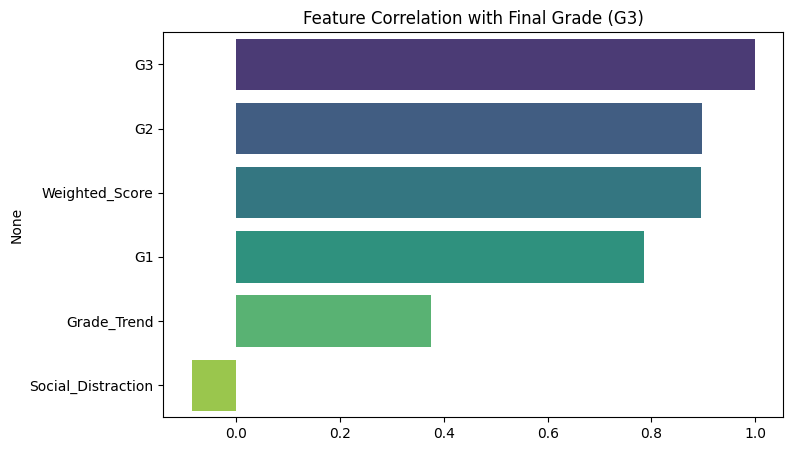

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df['Grade_Trend'] = df['G2'] - df['G1']

df['Social_Distraction'] = df['goout'] * (df['Dalc'] + df['Walc'])

#  میانگین وزنی نمرات (با وزن بیشتر به نمره اخیر)
df['Weighted_Score'] = (df['G1'] * 0.3) + (df['G2'] * 0.7)

new_features = ['Grade_Trend', 'Social_Distraction', 'Weighted_Score', 'G1', 'G2', 'G3']
corr = df[new_features].corr()['G3'].sort_values(ascending=False)

print("--- تاثیر ویژگی‌های جدید بر نمره نهایی ---")
print(corr)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title("Feature Correlation with Final Grade (G3)")
plt.show()

<div dir="rtl">

### تحلیل ویژگی‌های مهندسی شده: کدام ویژگی‌ها ارزش خلق کردن داشتند؟

در این بخش به بررسی اثربخشی ویژگی‌های جدیدی که ساخته‌ایم می‌پردازیم:

#### ۱. ویژگی `Weighted_Score` (همبستگی ۰.۸۹) ← "ابر ویژگی"
* **تحلیل:** این ویژگی با همبستگی ۰.۸۹، قدرتی معادل `G2` پیدا کرده و از `G1` (۰.۷۸) بسیار قوی‌تر است.
* **چرا مهم است؟** این یعنی ما توانسته‌ایم اطلاعات دو ستون را در یک ستون فشرده کنیم بدون آنکه اطلاعات حیاتی از دست برود.
* **استراتژی کاهش بعد:** در مرحله مدل‌سازی، می‌توان با جایگزینی این ویژگی به جای نمرات خام، جلوی **هم‌خطی (Multicollinearity)** را گرفت و مدل را سبک‌تر کرد.

---

#### ۲. ویژگی `Grade_Trend` (همبستگی ۰.۳۷) ← "الماس پنهان"
* **تحلیل:** عدد ۰.۳۷ برای یک ویژگی رفتاری که مستقیماً نمره خام نیست، بسیار عالی است.
* **تفسیر:** این ویژگی "شتاب پیشرفت" را مدل می‌کند. همبستگی مثبت نشان می‌دهد دانش‌آموزانی که روند صعودی داشته‌اند، در امتحان نهایی موفق‌تر عمل می‌کنند.
* **ارزش مدل‌سازی:** این ویژگی برای مدل‌هایی مثل **Random Forest** بسیار ارزشمند است، زیرا اجازه می‌دهد دانش‌آموزان "با انگیزه" از دانش‌آموزان "در حال افت" تفکیک شوند.



---

#### ۳. ویژگی `Social_Distraction` (همبستگی ۰.۰۸-) ← "شکارچی مردودی‌ها"
* **تحلیل:** همبستگی منفی ضعیف است، اما نباید عجولانه حذف شود.
* **راز پنهان:** این ویژگی احتمالاً رابطه **غیرخطی** دارد. برای اکثر دانش‌آموزان با تفریح نرمال، تأثیر آن کم است، اما در مقادیر بسیار بالا (خوش‌گذرانی مفرط)، احتمالاً نمره دچار سقوط آزاد می‌شود.

---

### پیشنهاد
توصیه می‌شود برای متغیر `Social_Distraction` از مدل **Random Forest** استفاده کنید تا تأثیرات غیرخطی آن را بسنجید؛ سپس بر اساس اهمیت ویژگی (Feature Importance) در مورد حذف یا نگه داشتن آن تصمیم‌گیری کنید.

</div>

<div dir="rtl" style="width: 100%; overflow: hidden; white-space: nowrap; text-align: center; margin: 60px 0; user-select: none;">
    <span style="color: #d97706; font-size: 18px; letter-spacing: 15px; opacity: 0.6;">
        ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆
    </span>
    <div style="font-size: 12px; color: #9ca3af; margin-top: -10px; background: #fff; display: inline-block; padding: 0 15px; position: relative; bottom: 12px;">
        Next Challenge
    </div>
</div>

<div dir="rtl">

### 🌌 چالش ۴: نفرین ابعاد (The Curse of Dimensionality)

<div dir="rtl">

### راهبرد کاهش ابعاد: مقابله با نفرین ابعاد

در این بخش با دو چالش اساسی روبرو هستیم که ما را به سمت استفاده از تحلیل مؤلفه‌های اصلی (PCA) سوق می‌دهد:

1.  **مشکل فنی:** تعداد زیاد ستون‌ها (**نفرین ابعاد** یا Curse of Dimensionality) که باعث گیج شدن مدل و بیش‌برازش (Overfitting) می‌شود.
2.  **مشکل مدیریتی:** نیاز به بهینه‌سازی فرآیند؛ وزیر آموزش و پرورش تمایل دارد با کمترین هزینه و پرسیدن کمترین سوالات ممکن، به نتیجه مطلوب برسد.

---

### گام ۱: آماده‌سازی و استانداردسازی (حیاتی!)

**نکته بسیار مهم:** الگوریتم PCA به شدت به "مقیاس" (**Scale**) داده‌ها حساس است. 



اگر داده‌ها را استاندارد نکنید، ستونی مانند `absences` (با بازه عددی ۰ تا ۹۰) به دلیل بزرگتر بودن مقادیرش، بر ستونی مانند `studytime` (با بازه ۱ تا ۴) غلبه می‌کند. در چنین حالتی، PCA به اشتباه تصور می‌کند که واریانس `absences` اهمیت بیشتری دارد و فریب می‌خورد. بنابراین، پیش از اجرای PCA، تمامی ویژگی‌ها باید به یک مقیاس واحد (میانگین ۰ و انحراف معیار ۱) برسند.

</div>

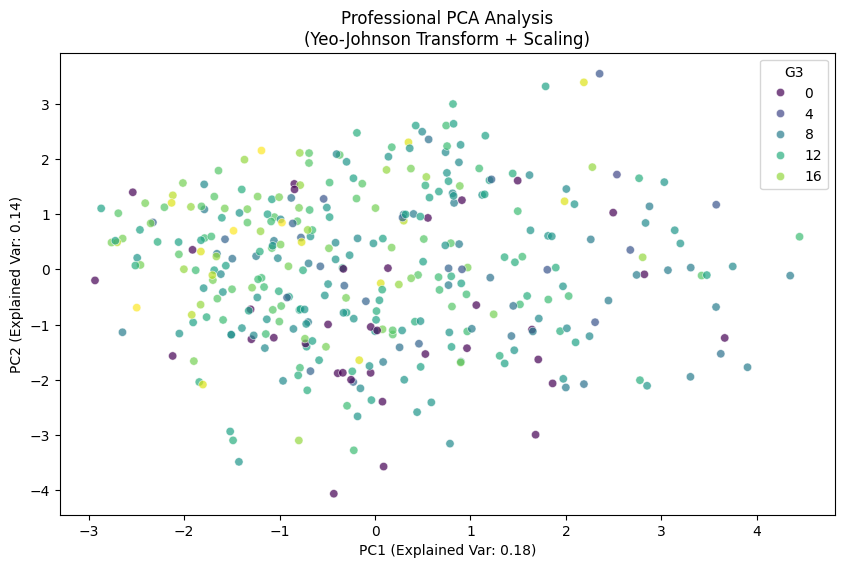

Total Explained Variance: 32.47%


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('train.csv')

# ما نمرات G1, G2, G3 را حذف می‌کنیم تا فقط ویژگی‌های دموگرافیک بمانند
cols_to_drop = ['G1', 'G2', 'G3']
X = data.select_dtypes(include=['number']).drop(columns=cols_to_drop)
y = data['G3'] # هدف برای رنگ‌آمیزی نمودار

# 3. ساخت پایپ‌لاین  (Transform -> Scale -> PCA)
# PowerTransformer: چولگی داده‌ها (مثل absences) را از بین می‌برد و آن‌ها را نرمال می‌کند
# StandardScaler: میانگین را صفر و انحراف معیار را یک می‌کند (برای PCA حیاتی است)
pca_pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')), 
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2))
])

pca_components = pca_pipeline.fit_transform(X)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['G3'] = y

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='G3', 
    data=pca_df, 
    palette='viridis', 
    marker='o',
    alpha=0.7
)
plt.title('Professional PCA Analysis\n(Yeo-Johnson Transform + Scaling)')
plt.xlabel(f'PC1 (Explained Var: {pca_pipeline.named_steps["pca"].explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Var: {pca_pipeline.named_steps["pca"].explained_variance_ratio_[1]:.2f})')
plt.show()

# نمایش واریانس حفظ شده
total_var = np.sum(pca_pipeline.named_steps["pca"].explained_variance_ratio_)
print(f"Total Explained Variance: {total_var:.2%}")

<div dir="rtl">

### تحلیل نتایج PCA: چرا تنها ۳۲٪ از واریانس پوشش داده شد؟

اینکه تنها ۳۲٪ از اطلاعات در دو مؤلفه اول حفظ شده است، در داده‌های علوم اجتماعی (مانند نمرات دانش‌آموزان) کاملاً طبیعی است. این اتفاق نشان‌دهنده ضعف مدل نیست، بلکه ناشی از ماهیت ذاتی داده‌های این حوزه است:

1. **حذف ستون‌های قدرتمند:** در کد اجرا شده (چالش ۴)، ما ستون‌های `G1` و `G2` را عمداً حذف کردیم. زمانی که این دو ستون (که همبستگی بسیار بالایی با نمره نهایی دارند) حذف می‌شوند، سایر ویژگی‌ها مانند شغل پدر، زمان مطالعه، مصرف الکل و غیره، هر کدام تأثیر کوچک و پراکنده‌ای بر خروجی دارند. در واقع، هیچ "شاه‌کلیدی" در این متغیرها وجود ندارد که به تنهایی بتواند بخش بزرگی از رفتار داده را توضیح دهد.

2. **پیچیدگی ابعاد (Dimensional Complexity):** داده‌های آموزشی "چند-وجهی" هستند. وضعیت تحصیلی دانش‌آموز تحت تأثیر ده‌ها عامل کوچک و مستقل است، نه دو عامل بزرگ و اصلی. به همین دلیل، PCA نمی‌تواند تمامی سیگنال‌های موجود را تنها در ۲ بُعد فشرده کند بدون اینکه بخش زیادی از جزئیات از دست برود.


**نتیجه‌گیری:** در چنین سناریوهایی، برای حفظ بخش قابل قبولی از اطلاعات (مثلاً ۷۰٪ یا ۸۰٪)، معمولاً به تعداد مؤلفه‌های بسیار بیشتری نیاز داریم و نمی‌توان به نمایش ۲ بعدی اکتفا کرد.

</div>

<div dir="rtl">

سوال وزیر: "مولفه اول (PC1) دقیقا چیست؟"
پاسخ شما: "آقای وزیر، PC1 ترکیبی خطی است از: $0.3 \times \text{Medu} + 0.2 \times \text{StudyTime} - 0.4 \times \text{Failures} + \dots$"
مشکل: این پاسخ برای مدیران غیرفنی غیرقابل فهم است. ما با PCA ویژگی‌ها را "ترکیب" کردیم (مثل مخلوط کردن مواد کیک). دیگر نمی‌توانیم تخم‌مرغ را از آرد جدا کنیم. به این کار Feature Extraction می‌گویند.
✅ راه حل جایگزین (Feature Selection):
اگر تفسیرپذیری برای وزیر مهم است، نباید از PCA استفاده کنیم. باید از روش‌های Feature Selection (مثل چالش قبل: Lasso یا RFE) استفاده کنیم.
در Feature Selection، ما ویژگی‌ها را ترکیب نمی‌کنیم، بلکه "انتخاب" می‌کنیم.
گزارش به وزیر: "آقای وزیر، ما از ۳۳ سوال، ۵ سوال کلیدی را نگه داشتیم: ۱. شغل پدر، ۲. زمان مطالعه، ۳. تعداد غیبت و..."
این روش دقیقاً همان ستون‌های اصلی را نگه می‌دارد و کاملاً تفسیرپذیر است.

</div>

<div dir="rtl" style="width: 100%; overflow: hidden; white-space: nowrap; text-align: center; margin: 60px 0; user-select: none;">
    <span style="color: #d97706; font-size: 18px; letter-spacing: 15px; opacity: 0.6;">
        ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆ ◆
    </span>
    <div style="font-size: 12px; color: #9ca3af; margin-top: -10px; background: #fff; display: inline-block; padding: 0 15px; position: relative; bottom: 12px;">
        Next Challenge
    </div>
</div>

<div dir="rtl">

### انتقال به دنیای واقعی: بسته‌بندی و ماژولار کردن کدها

تا الان ما در "زمین بازی" (`Jupyter Notebook`) بودیم. نوت‌بوک‌ها برای آزمایش و مصورسازی عالی هستند، اما برای تولید محصول نهایی و استقرار در محیط عملیاتی، ساختاری "کثیف" محسوب می‌شوند. در این چالش، ما کدهایمان را "بسته‌بندی" (Packaging) می‌کنیم.

---

### بخش اول: بازنویسی توابع (Modular Functions)

در این بخش، کدهایی که در سلول‌های مختلف نوت‌بوک پخش شده بودند را در قالب توابع واحد جمع‌آوری می‌کنیم. این کدها باید در فایل‌های با پسوند `.py` جداگانه نوشته شوند تا قابلیت بازاستفاده (**Reusability**) داشته باشند.




</div>

<div dir="rtl">

ابتدا پوشه‌ها را دقیقاً به این شکل بسازید (یا دستور زیر را در ترمینال بزنید):

```plaintext
My_DS_Project/
│
├── data/
│   ├── raw/                <-- فایل trian.csv را اینجا قرار دهید
│   └── processed/          <-- خروجی اینجا می‌رود
│
├── src/
│   ├── __init__.py         <-- یک فایل خالی بسازید
│   ├── data_loader.py
│   ├── preprocessing.py
│   ├── features.py
│   └── visualization.py
│
└── main.py

<div dir="rtl">

#### ۱. تابع بارگذاری داده (load_data)

این تابع باید در برابر خطاهای احتمالی (مثل نبود فایل) مقاوم باشد.

</div>

In [19]:
import pandas as pd
import os

def load_data(file_path):
    """
    بارگذاری داده‌ها از مسیر مشخص شده.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ فایل پیدا نشد: {file_path}")
    
    try:
        df = pd.read_csv(file_path)
        print(f"✅ داده‌ها با موفقیت بارگذاری شدند. ابعاد: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ خطا در خواندن فایل: {e}")
        return None

<div dir="rtl">

#### 📄 فایل ۲: `src/preprocessing.py`

(شامل کلاس هوشمند `SmartOutlierHandler` و تابع `clean_data` و حذف صفر های مشکوک)

</div>

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import EllipticEnvelope # <-- ایمپورت جدید

class SmartOutlierHandler(BaseEstimator, TransformerMixin):
    """
    مدیریت هوشمند داده‌های پرت تک‌متغیره (Univariate) با تشخیص توزیع داده.
    """
    def __init__(self, target_cols=None, threshold=3.0, iqr_multiplier=1.5):
        self.target_cols = target_cols
        self.threshold = threshold
        self.iqr_multiplier = iqr_multiplier
        self.bounds_ = {}

    def _is_normal(self, data):
        if len(data) < 8: return False, data.skew()
        stat, p_value = stats.shapiro(data)
        skewness = data.skew()
        if p_value > 0.05 and abs(skewness) < 0.8:
            return True, skewness
        return False, skewness

    def fit(self, X, y=None):
        df = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        if self.target_cols is None:
            self.target_cols = df.select_dtypes(include=[np.number]).columns.tolist()
            
        for col in self.target_cols:
            if col not in df.columns: continue
            data = df[col].dropna()
            is_normal_dist, skew_val = self._is_normal(data)
            
            if is_normal_dist:
                mean, std = data.mean(), data.std()
                lower = mean - (self.threshold * std)
                upper = mean + (self.threshold * std)
            else:
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - (self.iqr_multiplier * IQR)
                upper = Q3 + (self.iqr_multiplier * IQR)
            self.bounds_[col] = (lower, upper)
        return self

    def transform(self, X):
        df = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        for col, (lower, upper) in self.bounds_.items():
            if col in df.columns:
                df[col] = np.where(df[col] < lower, lower, df[col])
                df[col] = np.where(df[col] > upper, upper, df[col])
        return df

# --- کلاس جدید برای حذف پرت‌های چند متغیره ---
class ContextualOutlierCleaner(BaseEstimator, TransformerMixin):
    """
    حذف داده‌هایی که رابطه منطقی بین متغیرها را نقض می‌کنند.
    مثال: کسی که G1 بالا دارد اما G3 صفر شده است.
    """
    def __init__(self, contamination=0.1):
        self.contamination = contamination
        self.envelope = EllipticEnvelope(contamination=contamination, random_state=42)
        
    def fit(self, X, y=None):
        # این روش نیاز به فیت شدن ندارد چون در لحظه روی داده تصمیم می‌گیرد
        return self
    
    def transform(self, X):
        df = X.copy()
        # شرط حیاتی: این روش فقط زمانی کار می‌کند که G3 (هدف) را داشته باشیم
        # یعنی فقط روی داده Train اعمال می‌شود، نه Test
        if 'G1' in df.columns and 'G3' in df.columns:
            print("🕵️‍♂️ Running Contextual Outlier Detection (G1 vs G3)...")
            features = df[['G1', 'G3']]
            
            # تشخیص پرت‌ها (-1 یعنی پرت)
            # نکته: fit_predict روی کل داده انجام می‌شود
            is_outlier = self.envelope.fit_predict(features)
            
            # نگه داشتن داده‌هایی که پرت نیستند (یعنی == 1)
            initial_count = len(df)
            df_clean = df[is_outlier == 1]
            removed_count = initial_count - len(df_clean)
            
            print(f"   ✂️ Removed {removed_count} contextual outliers (e.g., Zero-Graders).")
            return df_clean
        else:
            print("⚠️ Skipping contextual outlier removal (Target column 'G3' missing).")
            return df

def clean_data(df):
    """
    تابع اصلی پاکسازی (نسخه آپدیت شده).
    """
    print("🧹 Starting data cleaning...")
    df_clean = df.copy()
    
    # 1. حذف تکراری
    df_clean = df_clean.drop_duplicates()
    
    # 2. پر کردن مقادیر گمشده
    # درسته که مقادیر گمشده نداشتیم ولی به طو
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype == 'object':
                df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
            else:
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # 3. مدیریت داده‌های پرت تک متغیره (Winsorization)
    # روی G3 اعمال نمی‌کنیم تا توزیع هدف دستکاری نشود
    cols_to_check = ['age', 'absences', 'G1', 'G2']
    valid_cols = [c for c in cols_to_check if c in df_clean.columns]
    
    outlier_handler = SmartOutlierHandler(target_cols=valid_cols)
    outlier_handler.fit(df_clean)
    df_clean = outlier_handler.transform(df_clean)
    
    # 4. مدیریت داده‌های پرت چند متغیره (NEW SECTION) 🚩
    # حذف کسانی که G1 دارند اما G3 صفر است (Contextual Outliers)
    contextual_cleaner = ContextualOutlierCleaner(contamination=0.06) # تنظیم دقیق‌تر
    df_clean = contextual_cleaner.transform(df_clean)
    
    print("✅ Data cleaning completed.")
    return df_clean

<div dir="rtl">

#### 📄 فایل ۳: `src/features.py`

(شامل مهندسی ویژگی و انکدینگ)

</div>

In [23]:
import pandas as pd
import numpy as np

def build_features(df):
    print("🏗 Building features...")
    df_feat = df.copy()
    
    # --- بخش ۱: خلق ویژگی‌های جدید ---
    
    # 1. روند پیشرفت (Grade Trend)
    if 'G1' in df_feat.columns and 'G2' in df_feat.columns:
        df_feat['Grade_Trend'] = df_feat['G2'] - df_feat['G1']
        df_feat['Weighted_Score'] = (df_feat['G1'] * 0.3) + (df_feat['G2'] * 0.7)
    
    # 2. شاخص حواس‌پرتی (Social Distraction)
    if all(col in df_feat.columns for col in ['goout', 'Dalc', 'Walc']):
        df_feat['Social_Distraction'] = df_feat['goout'] * (df_feat['Dalc'] + df_feat['Walc'])

    # 3. نسبت شکست به سن
    if 'failures' in df_feat.columns and 'age' in df_feat.columns:
        # جلوگیری از تقسیم بر صفر (هرچند سن ۰ نداریم)
        df_feat['Failure_Ratio'] = df_feat['failures'] / df_feat['age']

    # --- بخش ۲: انکدینگ ---
    
    # نگاشت دستی برای ستون‌های باینری
    binary_mapping = {'yes': 1, 'no': 0, 'F': 0, 'M': 1, 
                      'GP': 0, 'MS': 1, 'U': 0, 'R': 1, 
                      'LE3': 0, 'GT3': 1, 'T': 0, 'A': 1}
    
    for col in df_feat.columns:
        if df_feat[col].dtype == 'object':
            unique_vals = set(df_feat[col].unique())
            if unique_vals.issubset(set(binary_mapping.keys())):
                df_feat[col] = df_feat[col].map(binary_mapping)

    # برای ستون‌های Nominal باقی‌مانده از One-Hot Encoding استفاده می‌کنیم
    # ستون‌هایی مثل Mjob, Fjob, reason, guardian
    categorical_cols = df_feat.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        df_feat = pd.get_dummies(df_feat, columns=categorical_cols, drop_first=True)
        
    for col in df_feat.columns:
        if df_feat[col].dtype == 'bool':
             df_feat[col] = df_feat[col].astype(int)

    print(f"✅ Feature engineering completed. New shape: {df_feat.shape}")
    return df_feat

<div dir="rtl">

#### 📄 فایل ۴: `src/visualization.py`

(رسم نمودارهای تحلیل اکتشافی)

</div>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualization(df, target='G3'):
    print("📊 Generating visualizations...")
    sns.set(style="whitegrid")
    if target not in df.columns:
        print("⚠️ Target column not found, skipping target visualization.")
        return

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    

    sns.histplot(df[target], kde=True, ax=axes[0, 0], color='blue')
    axes[0, 0].set_title(f'Distribution of {target}')
    
    # 2. همبستگی ویژگی‌های جدید (اگر وجود داشته باشند)
    if 'Weighted_Score' in df.columns:
        sns.scatterplot(x='Weighted_Score', y=target, data=df, ax=axes[0, 1], color='green')
        axes[0, 1].set_title('Weighted Score vs G3')
        
    # 3. باکس پلات برای Grade Trend
    if 'Grade_Trend' in df.columns:
        sns.boxplot(x=df['Grade_Trend'], y=df[target], ax=axes[1, 0], palette='coolwarm', orient='h')
        axes[1, 0].set_title('Impact of Grade Trend on G3')

    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        corr = numeric_df.corr()
        cols = corr.nlargest(10, target)[target].index
        sns.heatmap(df[cols].corr(), annot=True, cmap='viridis', fmt='.2f', ax=axes[1, 1])
        axes[1, 1].set_title('Top 10 Correlated Features')

    plt.tight_layout()
    plt.show()
    print("✅ Visualization done.")

<div dir="rtl">

#### 📄 فایل ۵: `main.py`

(فایل اجرایی کل پروژه)

</div>

In [ ]:
import pandas as pd
import os
from src.data_loader import load_data
from src.preprocessing import clean_data
from src.features import build_features
from src.visualization import visualization

def run_pipeline():
    # مسیر فایل‌ها (فرضی)
    input_path = 'data/raw/train.csv'
    output_path = 'data/processed/train.csv'
    
    # بررسی وجود پوشه خروجی
    os.makedirs('data/processed', exist_ok=True)

    print("🚀 Pipeline Execution Started...")
    raw_df = load_data(input_path)
    
    if raw_df is not None:
        clean_df = clean_data(raw_df)
        
        final_df = build_features(clean_df)
        
        visualization(final_df)
        
        final_df.to_csv(output_path, index=False)
        print(f"💾 Processed data saved to: {output_path}")
        print("🎉 Pipeline finished successfully!")

if __name__ == "__main__":
    run_pipeline()

<div dir="rtl">

### نحوه اجرا

برای اجرای صحیح پروژه و دریافت نتایج، مراحل زیر را دنبال کنید:

1.  **آماده‌سازی داده‌ها:** مطمئن شوید فایل `train.csv` را در پوشه `data/raw/` قرار داده‌اید.
2.  **آماده‌سازی محیط:** ترمینال یا `Command Prompt` را در پوشه اصلی پروژه (`My_DS_Project`) باز کنید.
3.  **اجرای پایپ‌لاین:** دستور زیر را تایپ و اجرا کنید:

```bash
python main.py


<div dir="rtl">
دقت کنید کدهایی که در بالا بررسی کردیم، یک پایپ‌لاین الگو بود. شما باید پایپ‌لاین اختصاصی خودتان را وارد کنید تا در نهایت بتوانید عملکرد مدل خودتان را بسنجید. با این حال، می‌توانید از ساختار و کدهای ارائه شده به عنوان یک الگوی استاندارد  استفاده کنید.

</div>